In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import f1_score, roc_curve, precision_score, recall_score
import pickle
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [3]:
class DataProcess:
    def __init__(self, X, y):
        self.f_num = X.shape[1]
        self.mean = [np.mean(X, axis = 0), np.mean(y)]
        self.var = [np.var(X, axis = 0), np.var(y)]
        
    def normalization(self, X, y):
        for i in range(self.f_num):
            X[:, i] = (X[:, i] - self.mean[0][i]) / np.sqrt(self.var[0][i])
        y = (y - self.mean[1]) / np.sqrt(self.var[1])
        return X, y
    
    def de_normalization(self, y):
        y = y * np.sqrt(self.var[1]) + self.mean[1]
        return y
    
def is_number_tryexcept(s):
    """ Returns True is string is a number. """
    try:
        float(s)
        return True
    except ValueError:
        return False

In [4]:
df=pd.read_csv('childkidney_data.csv', index_col=0)
df.head()

,姓名,影像号,性别,侧别,月龄,DRF,APD,上盏,长径比,受损,患侧长径,健侧长径,上盏:APD
编号,,,,,,,,,,,,,
1,周驰越,75982935,1,2,4.566667,47.99,22,/,1.088235294,0,74.0,68,#VALUE!
2,顾浩楠,75441781,1,1,39.966667,43.50,25,10,1.257142857,0,88.0,70,0.4
3,王琨祺,76521940,1,1,16.766667,44.15,25,16,1.194444444,0,86.0,72,0.64
4,王琨祺,75937707,1,1,6.033333,43.83,18,11,1.233333333,0,74.0,60,0.611111111
5,展宁远,75659826,1,1,3.566667,48.46,17,14,1.116666667,0,67.0,60,0.823529412


In [5]:
df = pd.read_csv('childkidney_data.csv', header=None)
len(df)

652

In [7]:
validation_df = pd.read_csv('validation_set.csv', sep=',',header=None)
len(validation_df)

155

In [6]:
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold


df=pd.read_csv('childkidney_data.csv', sep=',',header=None)
# DRF value
y = [df[6][i] for i in range(1, len(df[6]))]
# filter out invalid values
indices = []
X_indices = [5, 7, 8, 9]
for i in range(len(df[0])):
    if is_number_tryexcept(df[5][i]) and is_number_tryexcept(df[6][i])\
    and is_number_tryexcept(df[7][i]) and is_number_tryexcept(df[8][i])\
    and is_number_tryexcept(df[9][i]):
        indices.append(i)

# shuffle is unnecessary
# random.shuffle(indices)
X = np.zeros((len(indices), 4))
y = np.zeros(len(indices))
for i in range(len(indices)):
    for j in range(len(X_indices)):
        X[i,j] = float(df[X_indices[j]][indices[i]])
    y[i] = float(df[6][indices[i]])


X_train = X.copy() # 年龄, APD, 上盏, 长径比
y_label_train = np.array([int(y[i] <= 40) for i in range(len(indices))])
print(X_train)
print(y_label_train)

[[39.96666667 25.         10.          1.25714286]
 [16.76666667 25.         16.          1.19444444]
 [ 6.03333333 18.         11.          1.23333333]
 ...
 [ 1.         59.         15.          1.71186441]
 [ 1.         45.         21.          1.71929825]
 [14.         51.         31.          1.5       ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 

In [24]:
import math

df=pd.read_csv('validation_set.csv', sep=',',header=None)
# DRF value
indices = []
X_indices = [4, 7, 8, 11]
for i in range(len(df[0])):
    if is_number_tryexcept(df[4][i]) and (not math.isnan(float(df[4][i]))) \
    and is_number_tryexcept(df[5][i]) and (not math.isnan(float(df[5][i])))\
    and is_number_tryexcept(df[7][i]) and (not math.isnan(float(df[7][i])))\
    and is_number_tryexcept(df[8][i]) and (not math.isnan(float(df[8][i])))\
    and is_number_tryexcept(df[11][i]) and (not math.isnan(float(df[11][i]))):
        indices.append(i)

# random.shuffle(indices)
X = np.zeros((len(indices), 4))
y = np.zeros(len(indices))
for i in range(len(indices)):
    for j in range(len(X_indices)):
        X[i, j] = float(df[X_indices[j]][indices[i]])
    y[i] = float(df[5][indices[i]])

y_label = np.array([int(y[i]<=40) for i in range(len(indices))])

X_test = X.copy() # 年龄, APD, 上盏, 长径比
y_label_test = y_label.copy()
y_test = y.copy()
print(X_test)
print(y_label_test)
# print(y_test)


[[  8.          29.          20.           1.35185185]
 [ 33.          39.          24.           1.13924051]
 [ 20.          16.          11.           1.12307692]
 [  3.           8.          14.           1.39215686]
 [ 13.          26.          16.           1.43478261]
 [  4.          15.          16.           1.1969697 ]
 [  7.          20.           7.           1.01492537]
 [ 10.          22.          11.           1.36666667]
 [  4.          28.          12.           1.23214286]
 [  9.          25.          13.           1.16129032]
 [  4.          28.          18.           1.47368421]
 [  4.          24.          24.           1.24285714]
 [  2.          24.          15.           1.48780488]
 [ 54.          16.          14.           1.1369863 ]
 [  9.          29.          13.           1.37142857]
 [  3.          20.          16.           1.11290323]
 [  9.          31.          20.           1.33333333]
 [  9.          31.          20.           1.33333333]
 [  2.    

In [25]:
# SVM
def SVM_fit(X_train, X_test, y_label_train, y_label_test, d, C):
    from sklearn.svm import SVC
    
    clf = SVC(C = C, kernel = 'poly', degree = d, probability=True)
    clf.fit(X_train, y_label_train)
    prediction_train_label = clf.predict(X_train)
    train_prob = clf.predict_proba(X_train)
    prediction_test_label = clf.predict(X_test)
    test_prob = clf.predict_proba(X_test)
    
    f1_test = f1_score(y_label_test, prediction_test_label)
    f1_train = f1_score(y_label_train, prediction_train_label)
    p_test = precision_score(y_label_test, prediction_test_label)
    p_train = precision_score(y_label_train, prediction_train_label)
    r_test = recall_score(y_label_test, prediction_test_label)
    r_train = recall_score(y_label_train, prediction_train_label)
    
    return clf, f1_test, f1_train, prediction_train_label, prediction_test_label, train_prob, test_prob

In [26]:
# logistic regression
def logistic_fit(X_train, X_test, y_label_train, y_label_test, degree, C):
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree)
    X_train_p = poly.fit_transform(X_train)
    X_test_p = poly.fit_transform(X_test)

    clf = LogisticRegression(random_state=0, C = C).fit(X_train_p, y_label_train)
    prediction_train_label = clf.predict(X_train_p)
    train_prob = clf.predict_proba(X_train_p)
    prediction_test_label = clf.predict(X_test_p)
    test_prob = clf.predict_proba(X_test_p)

    f1_test = f1_score(y_label_test, prediction_test_label)
    f1_train = f1_score(y_label_train, prediction_train_label)
    p_test = precision_score(y_label_test, prediction_test_label)
    p_train = precision_score(y_label_train, prediction_train_label)
    r_test = recall_score(y_label_test, prediction_test_label)
    r_train = recall_score(y_label_train, prediction_train_label)
    
    return clf, f1_test, f1_train, prediction_train_label, prediction_test_label, train_prob, test_prob

In [27]:
# random forest
def rf_fit(X_train, X_test, y_label_train, y_label_test, depth):

    from sklearn.ensemble import RandomForestClassifier
    
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_label_train)
    prediction_train_label = clf.predict(X_train)
    train_prob = clf.predict_proba(X_train)
    prediction_test_label = clf.predict(X_test)
    test_prob = clf.predict_proba(X_test)

    f1_test = f1_score(y_label_test, prediction_test_label)
    f1_train = f1_score(y_label_train, prediction_train_label)
    p_test = precision_score(y_label_test, prediction_test_label)
    p_train = precision_score(y_label_train, prediction_train_label)
    r_test = recall_score(y_label_test, prediction_test_label)
    r_train = recall_score(y_label_train, prediction_train_label)

    return clf, f1_test, f1_train, prediction_train_label, prediction_test_label, train_prob, test_prob

In [28]:
# random forest
# suggested depth 3, 4
depth = 2
rf_model, \
f1_test, f1_train, pred_train_label, \
pred_test_label, train_prob, test_prob = \
rf_fit(X_train.copy(), \
       X_test.copy(), \
       y_label_train.copy(), y_label_test.copy(),\
       depth)

In [29]:
# original version
# fpr = 1 - specificity
# tpr = sensitivity
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_label_test.copy(), test_prob[:, 1])
arg_max = np.argmax(rf_tpr - rf_fpr)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
print(rf_auc)
print(f"best combination: ({1 - rf_fpr[arg_max]}, {rf_tpr[arg_max]})")
print(f"best threshold: {rf_thresholds[arg_max]}")

0.9173155357804968
best combination: (0.8793103448275862, 0.8709677419354839)
best threshold: 0.612913814180958


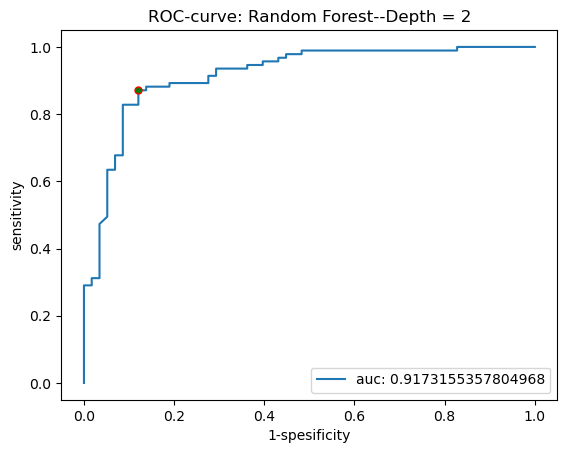

In [30]:
import matplotlib.pyplot as plt
# fig_name = "test.pdf"
plt.plot(rf_fpr, rf_tpr, label = f"auc: {rf_auc}")
plt.plot(rf_fpr[arg_max], rf_tpr[arg_max], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
plt.title("ROC-curve: Random Forest--Depth = 2")
plt.legend()
plt.xlabel('1-spesificity')
plt.ylabel('sensitivity')
# plt.savefig(fig_name)
plt.show()

In [31]:
# new version
# fpr = 1 - specificity
# tpr = sensitivity
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_label_test.copy(), test_prob[:, 1])
arg_best = np.argmax(rf_tpr - rf_fpr)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
rf_best_fpr = rf_fpr[arg_max]
rf_best_tpr = rf_tpr[arg_max]
if rf_best_tpr < 0.9:
    arg_best = np.where(rf_tpr >= 0.9)[0][0]
    rf_best_fpr = rf_fpr[arg_best]
    rf_best_tpr = rf_tpr[arg_best]
print(rf_auc)
print(f"best combination: ({1 - rf_best_fpr}, {rf_best_tpr})")
print(f"best threshold: {rf_thresholds[arg_best]}")

0.9173155357804968
best combination: (0.7241379310344828, 0.9139784946236559)
best threshold: 0.5691277848834578


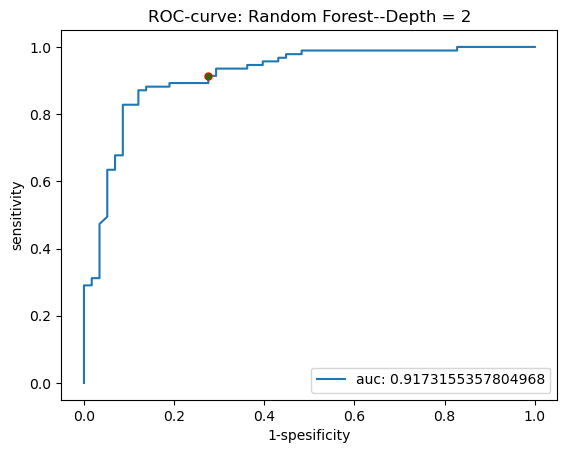

In [32]:
import matplotlib.pyplot as plt
# fig_name = "test.pdf"
plt.plot(rf_fpr, rf_tpr, label = f"auc: {rf_auc}")
plt.plot(rf_best_fpr, rf_best_tpr, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
plt.title("ROC-curve: Random Forest--Depth = 2")
plt.legend()
plt.xlabel('1-spesificity')
plt.ylabel('sensitivity')
# plt.savefig(fig_name)
plt.show()

In [33]:
# logistic regression
# suggested 2 or 3
poly_deg = 3
# suggested 1e-1, 1e0, 1e1
penalty_coef = 1e0
logistic_model, \
f1_test, f1_train, pred_train_label, \
pred_test_label, train_prob, test_prob = \
logistic_fit(X_train.copy(), \
             X_test.copy(), \
             y_label_train.copy(), y_label_test.copy(),\
             poly_deg, penalty_coef)

/Users/gengliyuan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# fpr = 1 - specificity
# tpr = sensitivity
logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(y_label_test.copy(), test_prob[:, 1])
arg_max = np.argmax(logistic_tpr - logistic_fpr)
logistic_auc = metrics.auc(logistic_fpr, logistic_tpr)
print(logistic_auc)
print(f"best combination: ({1 - logistic_fpr[arg_max]}, {logistic_tpr[arg_max]})")
print(f"best threshold: {logistic_thresholds[arg_max]}")

0.9352984797923619
best combination: (0.8793103448275862, 0.9139784946236559)
best threshold: 0.6703027051473428


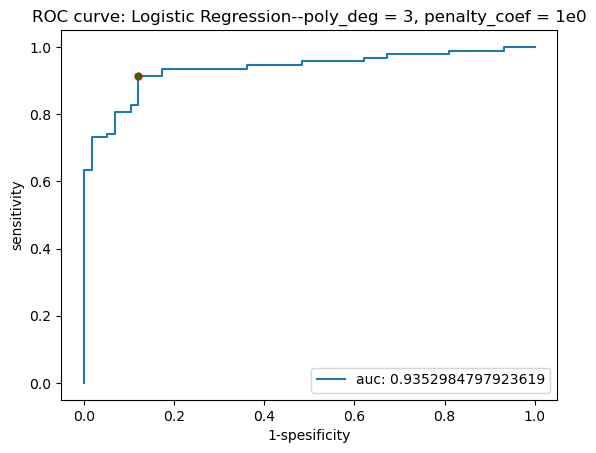

In [35]:
import matplotlib.pyplot as plt
# fig_name = "test.pdf"
plt.plot(logistic_fpr, logistic_tpr, label = f"auc: {logistic_auc}")
plt.plot(logistic_fpr[arg_max], logistic_tpr[arg_max], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
plt.title("ROC curve: Logistic Regression--poly_deg = 3, penalty_coef = 1e0")
plt.legend()
plt.xlabel('1-spesificity')
plt.ylabel('sensitivity')
# plt.savefig(fig_name)
plt.show()

In [36]:
# SVM
# suggested 2 or 3
poly_deg = 3
# suggested 1e-1, 1e0, 1e1
penalty_coef = 1e0
SVM_model, \
f1_test, f1_train, pred_train_label, \
pred_test_label, train_prob, test_prob = \
SVM_fit(X_train.copy(),\
        X_test.copy(),\
        y_label_train.copy(), y_label_test.copy(),\
        poly_deg, penalty_coef)

In [37]:
SVM_fpr, SVM_tpr, SVM_thresholds = roc_curve(y_label_test.copy(), test_prob[:, 1])
arg_max = np.argmax(SVM_tpr - SVM_fpr)
SVM_auc = metrics.auc(SVM_fpr, SVM_tpr)
print(SVM_auc)
print(f"best combination: ({1 - SVM_fpr[arg_max]}, {SVM_tpr[arg_max]})")
print(f"best threshold: {SVM_thresholds[arg_max]}")

0.9410456062291435
best combination: (0.9310344827586207, 0.8064516129032258)
best threshold: 0.6732380795565994


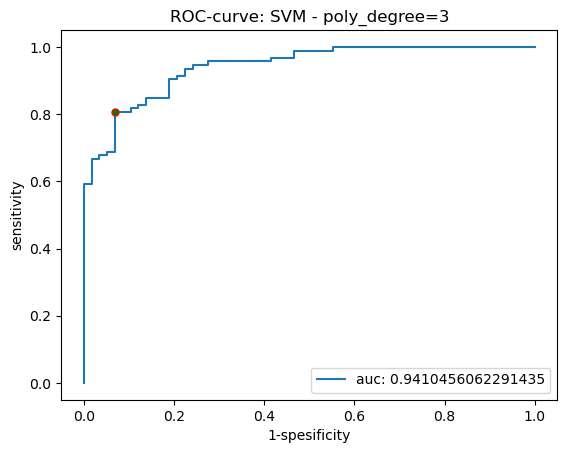

In [38]:
# SVM ROC curve
import matplotlib.pyplot as plt
# fig_name = "test.pdf"
plt.plot(SVM_fpr, SVM_tpr, label = f"auc: {SVM_auc}")
plt.plot(SVM_fpr[arg_max], SVM_tpr[arg_max], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
plt.title("ROC-curve: SVM - poly_degree=3")
plt.legend()
plt.xlabel('1-spesificity')
plt.ylabel('sensitivity')
# plt.savefig(fig_name)
plt.show()

In [39]:
# original version
# when feeding new X into model, predict the output with the best threshold
# y_label_val & val_prob are used to calculate the roc curve and then get the best threhold based on the roc curve
# model & X_new are used to calculate the new_proba, and get the y_new using the best threhold
def predict_new(model, X_new, y_label_val, val_prob):
    fpr, tpr, thresholds = roc_curve(y_label_val.copy(), val_prob[:, 1])
    arg_max = np.argmax(tpr - fpr)
    best_threshold = thresholds[arg_max]
    auc = metrics.auc(fpr, tpr)
    print(auc)
    print(f"best combination: ({1 - fpr[arg_max]}, {tpr[arg_max]})")
    print(f"best threshold: {best_threshold}")
    new_proba = model.predict_proba(X_new)
    assert len(new_proba) == len(X_new)
    y_new = [int(new_proba[i, -1] >= best_threshold) for i in range(len(X_new))]
    return best_threshold, auc, new_proba, y_new


In [40]:
# new version
# when feeding new X into model, predict the output with the best threshold
# y_label_val & val_prob are used to calculate the roc curve and then get the best threhold based on the roc curve
# model & X_new are used to calculate the new_proba, and get the y_new using the best threhold
def predict_new(model, X_new, y_label_val, val_prob):
    fpr, tpr, thresholds = roc_curve(y_label_val.copy(), val_prob[:, 1])
    arg_best = np.argmax(tpr - fpr)
    auc = metrics.auc(fpr, tpr)
    if tpr[arg_best] < 0.9:
        arg_best = np.where(tpr >= 0.9)[0][0]
    best_threshold = thresholds[arg_best]
    best_fpr = fpr[arg_best]
    best_tpr = tpr[arg_best]
    print(auc)
    print(f"best combination: ({1 - best_fpr}, {best_tpr})")
    print(f"best threshold: {best_threshold}")
    new_proba = model.predict_proba(X_new)
    assert len(new_proba) == len(X_new)
    y_new = [int(new_proba[i, -1] >= best_threshold) for i in range(len(X_new))]
    return best_threshold, auc, new_proba, y_new

In [41]:
# toy example
a,b,c,d = predict_new(rf_model, [[1,2,3,4]], y_label_test, test_prob)
a,b,c,d

0.9410456062291435
best combination: (0.8103448275862069, 0.9032258064516129)
best threshold: 0.5995314432198882


(0.5995314432198882,
 0.9410456062291435,
 array([[0.34773296, 0.65226704]]),
 [1])

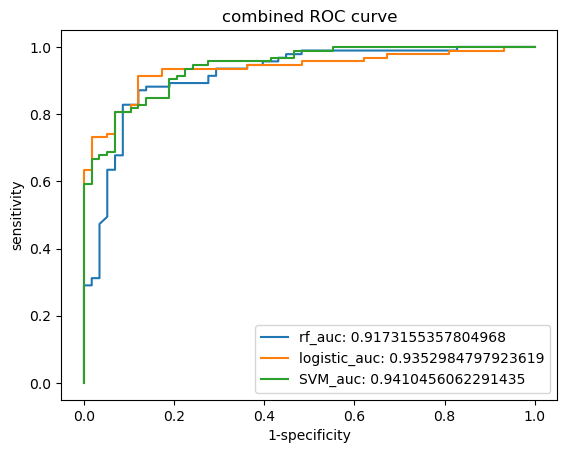

In [42]:
# combined ROC curve
import matplotlib.pyplot as plt
# fig_name = "combined_ROC.pdf"
plt.plot(rf_fpr, rf_tpr, label = f"rf_auc: {rf_auc}")
plt.plot(logistic_fpr, logistic_tpr, label = f"logistic_auc: {logistic_auc}")
plt.plot(SVM_fpr, SVM_tpr, label = f"SVM_auc: {SVM_auc}")
plt.title("combined ROC curve")
plt.legend()
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
# plt.savefig(fig_name)
plt.show()